# Logistic回归

## 梯度下降法(gradient descent)
下面的h(x)是要拟合的函数，J(theta)损失函数，theta是参数，要迭代求解的值，theta求解出来了那最终要拟合的函数h(theta)就出来了。其中m是训练集的记录条数，n是参数的个数。

$$
h(\theta) = \sum\limits_{j=0}^n\theta_jx_j
$$

$$
J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^{m}(y^i-h_\theta(x^i))^2
$$

（1）将J(theta)对theta求偏导，得到每个theta对应的的梯度

$$
\frac{\partial J(\theta)}{\partial \theta_j} = -\frac{1}{m}\sum\limits_{i=1}^{m}(y^i-h_\theta(x^i))x_j^i
$$

（2）由于是要最小化风险函数，所以按每个参数theta的梯度负方向，来更新每个theta

$$
\theta_j = \theta_j + \frac{\partial J(\theta)}{\partial \theta_j}
$$
即使  
$$
\theta_j = \theta_j + \frac{1}{m}\sum\limits_{i=1}^{m}(y^i-h_\theta(x^i))x_j^i
$$

将以上公式改成向量形式的表达，以获取计算时的加速，以参数个数为2的时候为例
$h(\theta)$等价的说法是:  
$$
h = \theta^Tx
$$
其中,
$$
\theta = 
\begin{pmatrix}
\theta_0\\
\theta_1
\end{pmatrix}
$$

更新公式:
$$
\theta = \theta + \alpha\nabla_\theta f(\theta)
$$
其中  
$$
\nabla _\theta f(\theta) = 
\begin{pmatrix}
\frac{\partial f(x,y)}{\partial x}\\
\frac{\partial f(x,y)}{\partial y}
\end{pmatrix}
$$

算法思想如下：  
（1） 初始化回归系数  
（2） 重复N次:  
　　计算整个数据集的梯度  
　　使用*alpha* x *gradient*更新回归系数的向量　

In [1]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

构造集合

In [2]:
randomX = random.random((50,1))

In [3]:
randomX.shape

(50L, 1L)

In [4]:
randomY = random.random((50,1))

In [5]:
randomIn = np.concatenate((randomX,randomY),axis = 1)

In [6]:
randomIn = np.concatenate((randomIn,np.zeros((50,1))),axis=1)

In [7]:
for i in range(randomIn.shape[0]):
    if randomIn[i][0] + randomIn[i][1] > 1:
        randomIn[i][2] = 1
    if random.random() < 0.05:
        randomIn[i][2] = (randomIn[i][2] + 1) % 2 
    #手动 生成一些噪声点

<IPython.core.display.Javascript object>


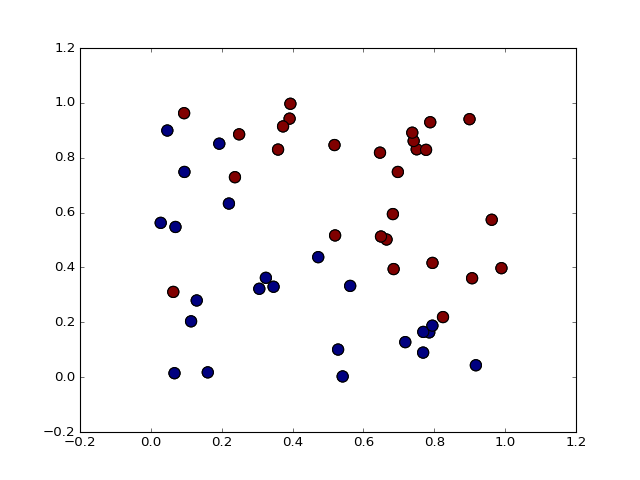

In [8]:
fig = plt.figure()

In [9]:
ax = fig.add_subplot(111)

In [11]:
ax.scatter(randomIn[:,0],randomIn[:,1],s = 100,c = randomIn[:,2])

In [12]:
label = randomIn[:,2].reshape(50,1)

In [13]:
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [14]:
Inp = np.concatenate((randomIn[:,[0,1]],np.ones((50,1))),axis = 1)

In [15]:
m,n = Inp.shape

In [16]:
alpha = 0.001
epoch_num = 500

In [17]:
weight = np.ones((n,1))

In [18]:
print Inp.shape
print weight.shape

(50L, 3L)
(3L, 1L)


In [19]:
def sigmoid(inputX):
    return 1.0/(1 + np.exp(-inputX))

In [20]:
for i in range(epoch_num):
    h = sigmoid(Inp.dot(weight))
    weight = weight + alpha*(Inp.transpose().dot((label-h)))   #待解决：矩阵乘法和直接数乘之间有没有交换律? 

In [21]:
weight

array([[ 0.9965392 ],
       [ 1.65038099],
       [-1.05566853]])

weight随着迭代次数增加 不断增大 ，但相对关系不变，即稳定后，随比例同步增长，需不需要归一化操作?

In [22]:
x = np.arange(0,1,0.01)

In [23]:
y = (-weight[2]-weight[0]*x)/weight[1]

In [24]:
ax.scatter(randomIn[:,0],randomIn[:,1],s = 100,c = randomIn[:,2])

In [25]:
ax.plot(x,y)

In [26]:
plt.show()